In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score,
    f1_score, roc_auc_score, classification_report
)
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier

In [2]:
df=pd.read_csv('Telco.csv')
pd.set_option('display.max_columns', None)
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [4]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [5]:
for col in df.columns:
    print(f"{col}: {df[col].unique()} unique values")

customerID: ['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK'] unique values
gender: ['Female' 'Male'] unique values
SeniorCitizen: [0 1] unique values
Partner: ['Yes' 'No'] unique values
Dependents: ['No' 'Yes'] unique values
tenure: [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39] unique values
PhoneService: ['No' 'Yes'] unique values
MultipleLines: ['No phone service' 'No' 'Yes'] unique values
InternetService: ['DSL' 'Fiber optic' 'No'] unique values
OnlineSecurity: ['No' 'Yes' 'No internet service'] unique values
OnlineBackup: ['Yes' 'No' 'No internet service'] unique values
DeviceProtection: ['No' 'Yes' 'No internet service'] unique values
TechSupport: ['No' 'Yes' 'No internet service'] unique values
StreamingTV: ['No' 'Yes' 'No internet service'] unique values
StreamingMovie

## 요약

|변수|정의|설명|분류|타입|
|---|---|---|---|---|
|customerID|고객 ID|고객 고유 ID|범주형|object|
|gender|성별|남성(Male) 또는 여성(Female)|범주형|object|
|SeniorCitizen|고령자 여부|고령자(1) 또는 비고령자(0)|범주형|int64|
|Partner|파트너 유무|파트너 있음(Yes) 또는 없음(No)|범주형|object|
|Dependents|부양 가족 유무|부양 가족 있음(Yes) 또는 없음(No)|범주형|object|
|tenure|계약 기간|고객의 계약 기간(월)|수치형|int64|
|PhoneService|전화 서비스 가입 여부|가입(Yes) 또는 미가입(No)|범주형|object|
|MultipleLines|복수 회선 가입 여부|가입(Yes), 미가입(No), 전화 서비스 없음(No phone service)|범주형|object|
|InternetService|인터넷 서비스 제공 업체|DSL, 광섬유(Fiber optic), 없음(No)|범주형|object|
|OnlineSecurity|온라인 보안 서비스 가입 여부|가입(Yes), 미가입(No), 인터넷 서비스 없음(No internet service)|범주형|object|
|OnlineBackup|온라인 백업 서비스 가입 여부|가입(Yes), 미가입(No), 인터넷 서비스 없음(No internet service)|범주형|object|
|DeviceProtection|장치 보호 서비스 가입 여부|가입(Yes), 미가입(No), 인터넷 서비스 없음(No internet service)|범주형|object|
|TechSupport|기술 지원 서비스 가입 여부|가입(Yes), 미가입(No), 인터넷 서비스 없음(No internet service)|범주형|object|
|StreamingTV|TV 스트리밍 서비스 가입 여부|가입(Yes), 미가입(No), 인터넷 서비스 없음(No internet service)|범주형|object|
|StreamingMovies|영화 스트리밍 서비스 가입 여부|가입(Yes), 미가입(No), 인터넷 서비스 없음(No internet service)|범주형|object|
|Contract|계약 유형|월별(Month-to-month), 1년(One year), 2년(Two year)|범주형|object|
|PaperlessBilling|종이 청구서 사용 여부|사용(Yes) 또는 미사용(No)|범주형|object|
|PaymentMethod|결제 방법|전자 수표(Electronic check), 우편 수표(Mailed check), 은행 이체(Bank transfer (automatic)), 신용카드(신용카드(automatic))|범주형|object|
|MonthlyCharges|월별 청구 금액|고객의 월별 청구 금액(달러)|수치형|float64|
|TotalCharges|총 청구 금액|고객의 총 청구 금액(달러)|수치형|object|
|Churn|고객 이탈 여부|이탈(Yes) 또는 유지(No)|범주형|object|

# 데이터 전처리

## 결측치 처리

In [6]:
df.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [7]:
df['TotalCharges'].value_counts(normalize=True).sort_index()*100
# '' 값이 있는 행 확인
# 약 0.16% 정도로 매우 적음
# Drop 처리 진행 후 to_numeric 변환

TotalCharges
          0.156183
100.2     0.014198
100.25    0.014198
100.35    0.014198
100.4     0.014198
            ...   
997.75    0.014198
998.1     0.014198
999.45    0.014198
999.8     0.014198
999.9     0.014198
Name: proportion, Length: 6531, dtype: float64

In [8]:
df = df[df['TotalCharges'] != " "]
df['TotalCharges']=pd.to_numeric(df['TotalCharges'])
df['TotalCharges'].dtype

dtype('float64')

## 데이터 변환

In [9]:
df=df.drop(columns=['customerID'])

In [10]:
# boolean 변수를 원-핫 인코딩 처리
df=pd.get_dummies(df,columns=['gender', 'Partner', 'Dependents', 'PhoneService',  'PaperlessBilling',  'Churn'], drop_first=True, dtype=int)

In [ ]:


line_mapping = {
    'No phone service': 0,
    'No': 1,
    'Yes': 2}
line=df[['MultipleLines']]

internet_mapping = {
    'DSL': 1,
    'Fiber optic': 2,
    'No': 0
}
internet_mapping=df[['InternetService']]

service_mapping = {
    'No internet service': 0,
    'No': 1,
    'Yes': 2
}
service=df[['OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies']]

contract_mapping = {
    'Month-to-month': 0,
    'One year': 1,
    'Two year': 2
}
contract=df[['Contract']]

payment_mapping = {
    'Electronic check': 0,
    'Mailed check': 1,
    'Bank transfer (automatic)': 2,
    'Credit card (automatic)': 3
}
payment=df[['PaymentMethod']]

df_relation=df.copy()
df_relation['MultipleLines']=df_relation['MultipleLines'].map(line_mapping)
df_relation['InternetService']=df_relation['InternetService'].map(internet_mapping)
df_relation['OnlineSecurity']=df_relation['OnlineSecurity'].map(service_mapping)
df_relation['OnlineBackup']=df_relation['OnlineBackup'].map(service_mapping)
df_relation['DeviceProtection']=df_relation['DeviceProtection'].map(service_mapping)
df_relation['TechSupport']=df_relation['TechSupport'].map(service_mapping)
df_relation['StreamingTV']=df_relation['StreamingTV'].map(service_mapping)
df_relation['StreamingMovies']=df_relation['StreamingMovies'].map(service_mapping)
df_relation['Contract']=df_relation['Contract'].map(contract_mapping)
df_relation['PaymentMethod']=df_relation['PaymentMethod'].map(payment_mapping)

# 그래프 및 상관관계 

1. 연령대
    1. 연령대가 높으면 이탈률 비율이 높다.
    2. 연령대가 높으면서, 계약 기간이 낮을 때 이탈률이 높다.
    3. 
2. 계약 기간
    1. 계약 기간이 0에 가까울 때 이탈률이 거의 100%
    2. 계약 기간이 낮은데, 월별 금액이 높은 경우 거의 이탈 (초반에 무료 몇 개월을 주면 좋을 듯)
    3. 계약 기간과 총기간의 아랫단을 타고 올라간다.(계약기간 별 최저금액만을 얻는 것은 이탈할 확률이 크다. 별 메리트가 없다고 느끼겟다)
    4. 
3. 월별 금액
    1. 월별 금액이 낮으면 거의 이탈하지 않는다. 최저가 서비스를 이용하면 이탈하지 않음.
    1. 총금액 비율 중 월별 금액이 높으면 이탈한다.(월별 금액 외에 서비스 가입 비용으로 나눠서 받는 게 나을 듯?)
2. tenure이 낮은 고객은 이탈률이 높다. / 계약 기간이 길면 이탈하지 않는다.
3. 월별 청구 금액이 낮으면 이탈하지 않는다 / 

In [18]:
df_relation.columns

Index(['SeniorCitizen', 'tenure', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'gender_Male', 'Partner_Yes',
       'Dependents_Yes', 'PhoneService_Yes', 'PaperlessBilling_Yes',
       'Churn_Yes'],
      dtype='object')

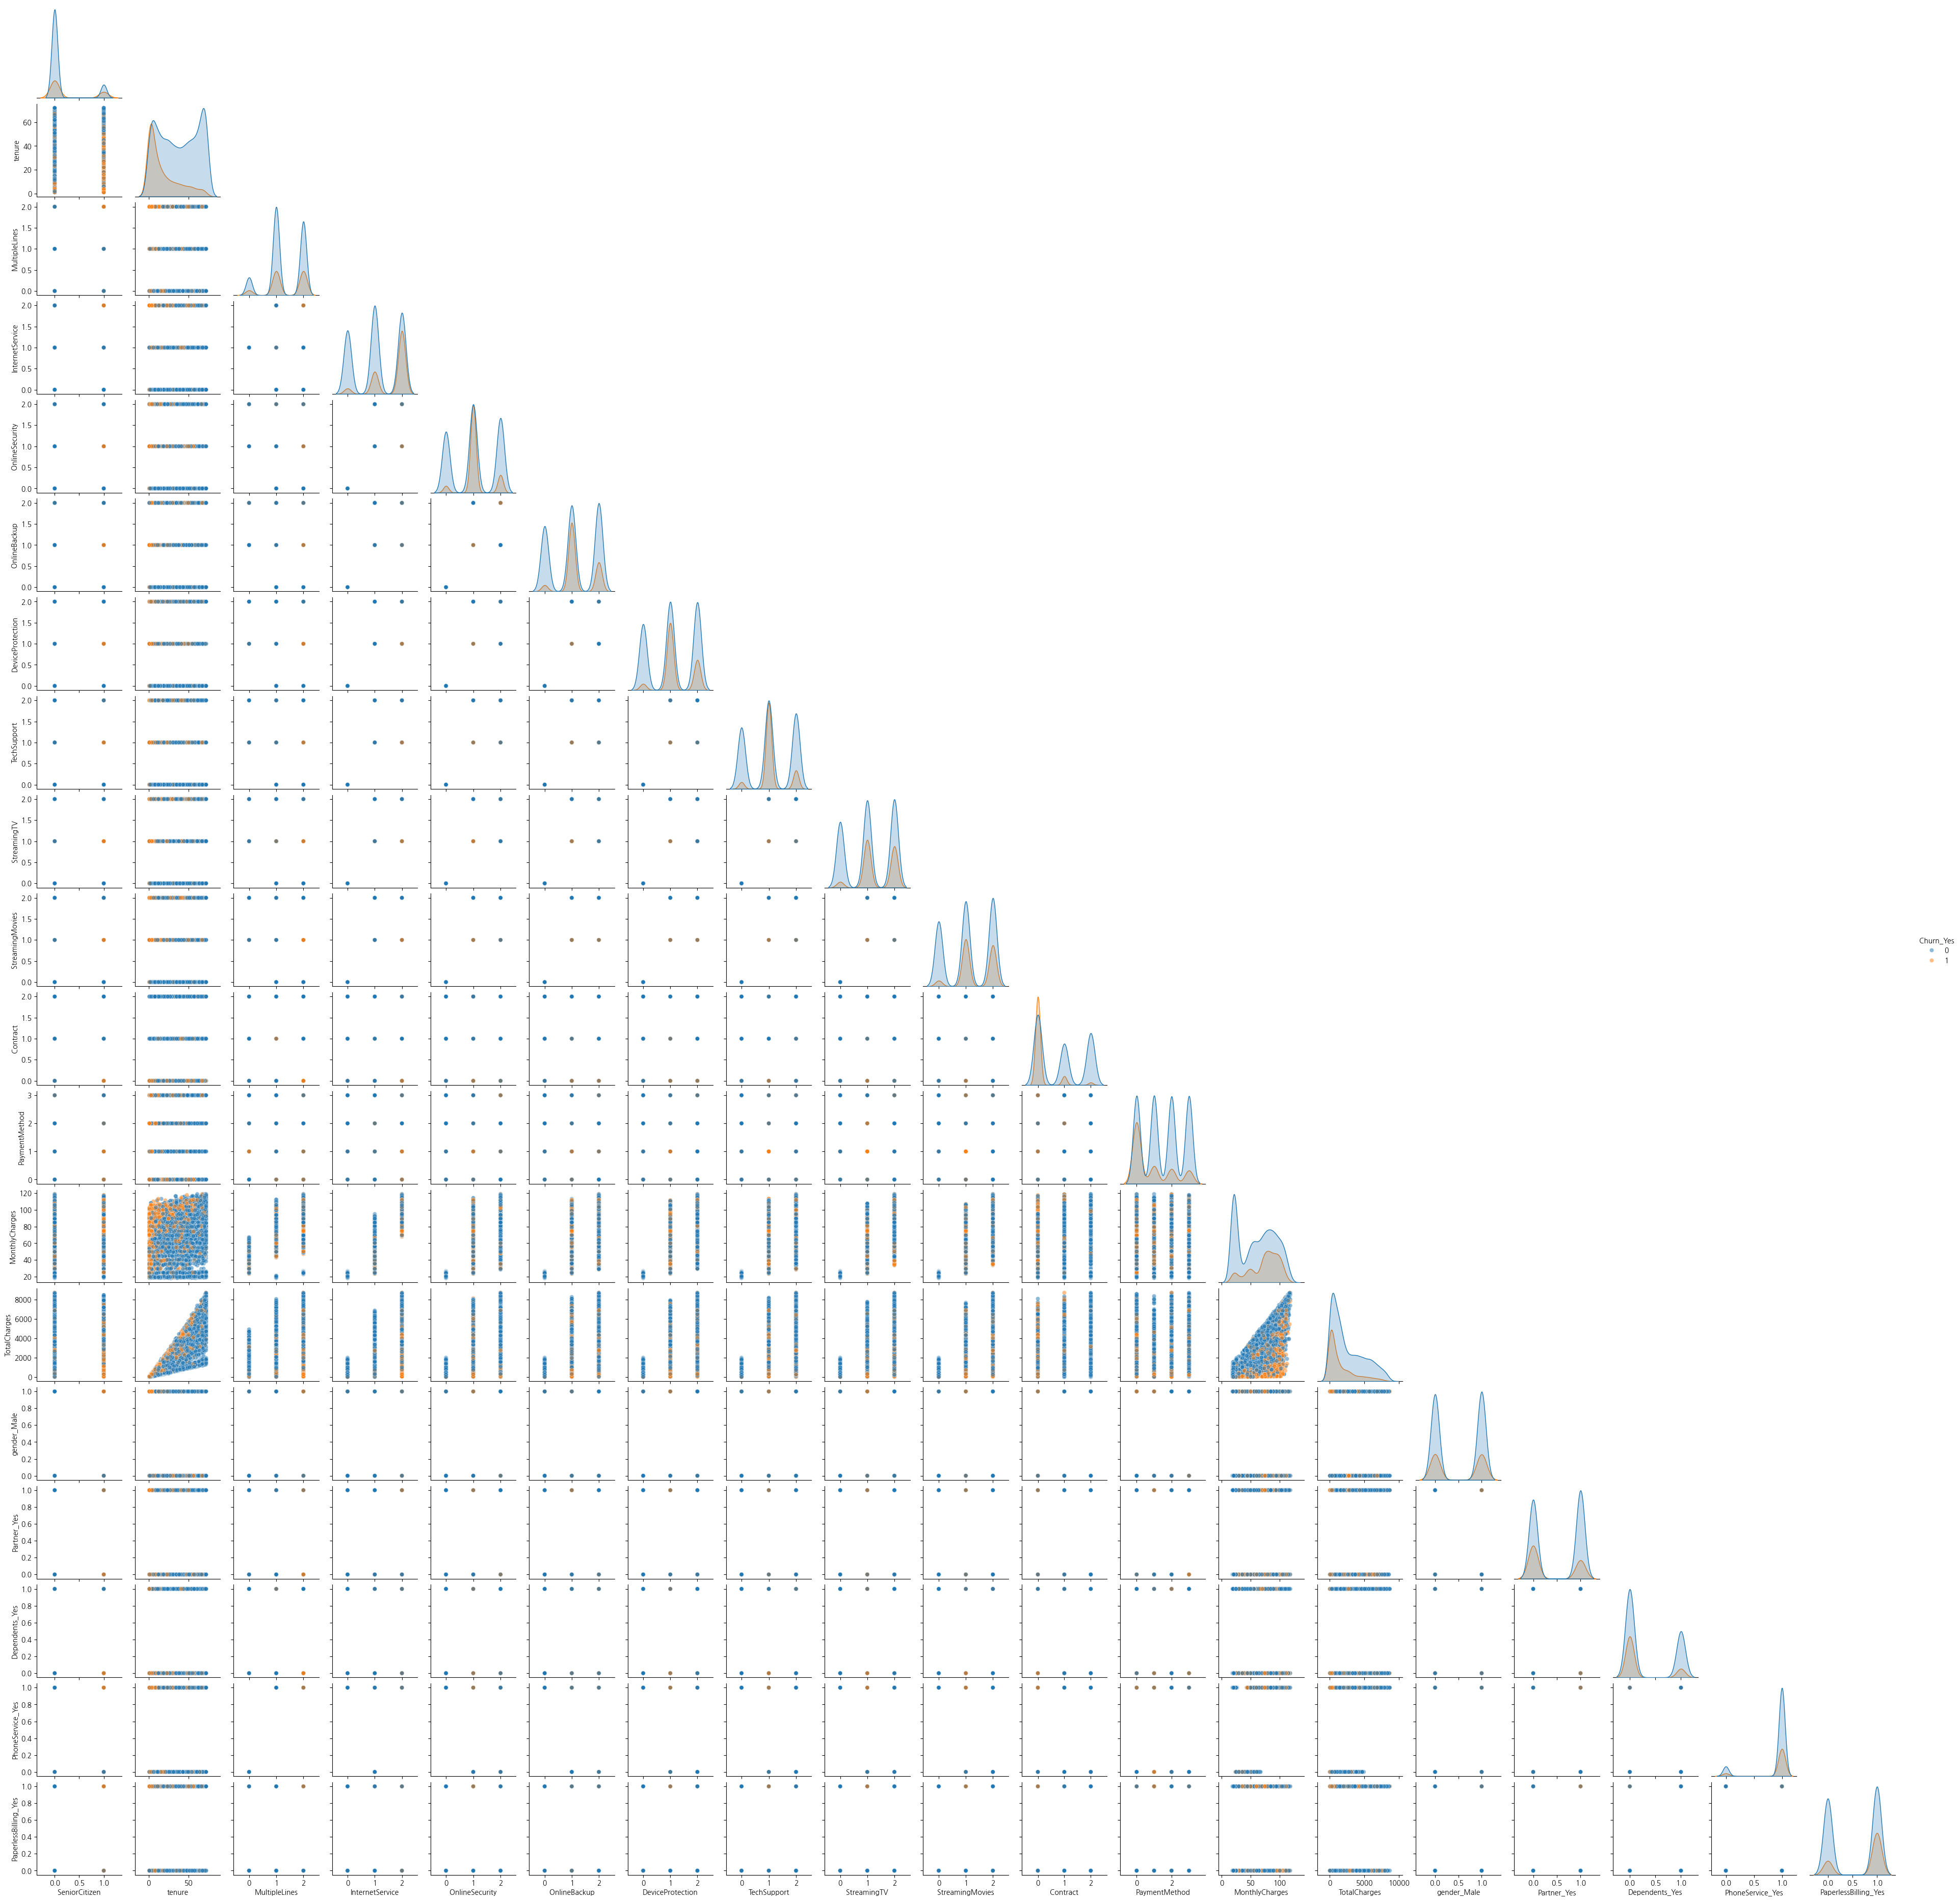

In [ ]:
sns.pairplot(df_relation,vars=['SeniorCitizen', 'tenure', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'gender_Male', 'Partner_Yes',
       'Dependents_Yes', 'PhoneService_Yes', 'PaperlessBilling_Yes',
       ], hue='Churn_Yes', plot_kws={'alpha': 0.5},corner=True)
plt.show()

<Axes: >

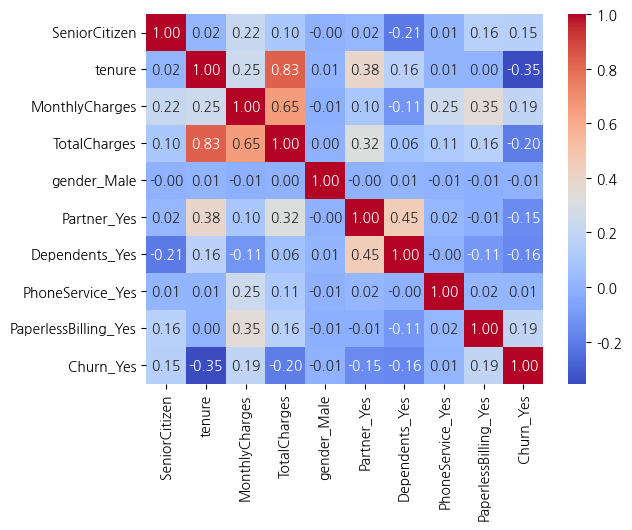

In [24]:
sns.heatmap(df.corr(numeric_only=True), annot=True, fmt=".2f", cmap='coolwarm')

<Axes: xlabel='TotalCharges', ylabel='MonthlyCharges'>

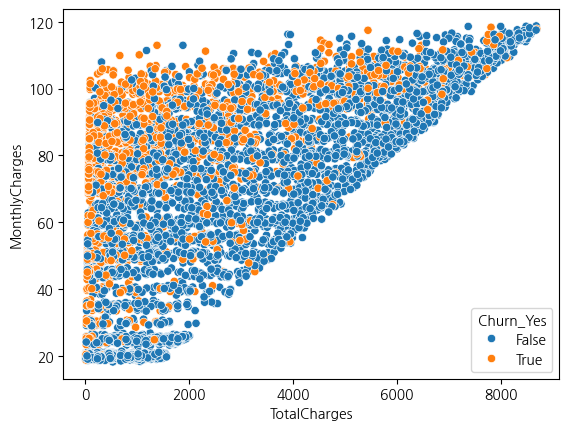

In [ ]:
sns.scatterplot(data=df, x='TotalCharges', y='MonthlyCharges', hue='Churn_Yes')

<Axes: xlabel='TotalCharges', ylabel='MonthlyCharges'>

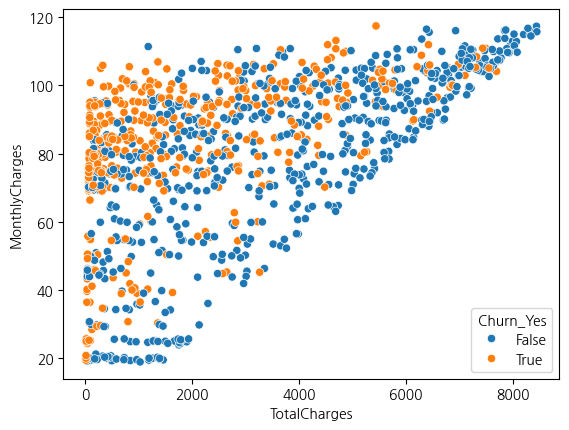

In [ ]:
senior_churn = df[df['SeniorCitizen'] == 1]
sns.scatterplot(data=senior_churn, x='TotalCharges', y='MonthlyCharges', hue='Churn_Yes')

# 피쳐 추가 전


## 로지스틱 회귀

In [ ]:
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression

              precision    recall  f1-score   support

           0       0.85      0.89      0.87      1033
           1       0.65      0.57      0.61       374

    accuracy                           0.80      1407
   macro avg       0.75      0.73      0.74      1407
weighted avg       0.80      0.80      0.80      1407



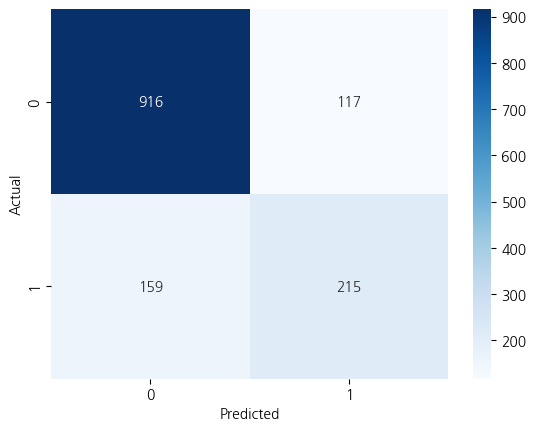

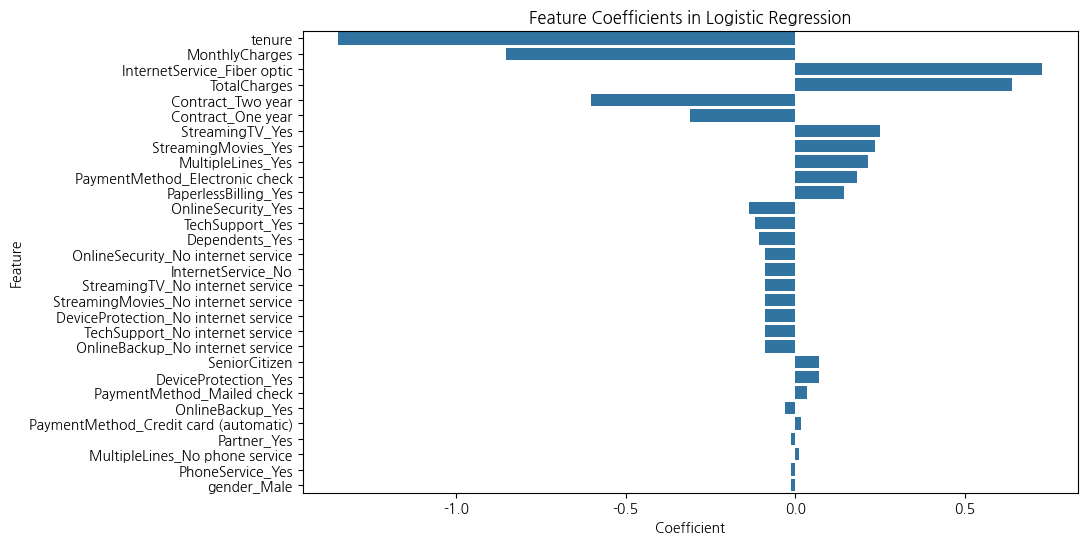

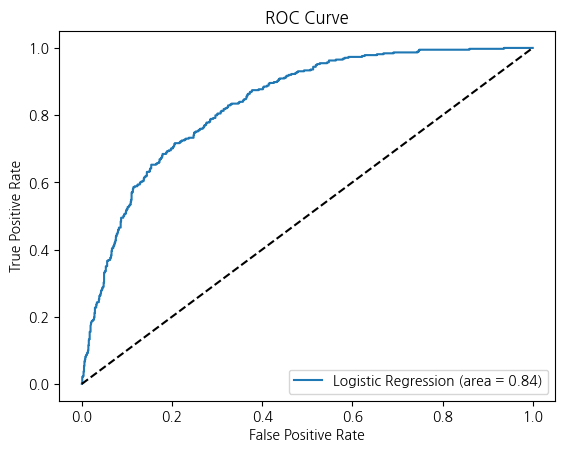

In [49]:
onehot_df=pd.get_dummies(df, columns=['MultipleLines','InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract','PaymentMethod'], drop_first=True)
y=onehot_df['Churn_Yes']
X=onehot_df.drop(columns=['Churn_Yes'])

X_train_lr, X_test_lr, y_train_lr, y_test_lr = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_lr)
X_test_scaled = scaler.transform(X_test_lr)

lr = LogisticRegression(max_iter=1000)
lr.fit(X_train_scaled, y_train_lr)
y_pred_lr = lr.predict(X_test_scaled)
print(classification_report(y_test_lr, y_pred_lr))
conf_matrix = confusion_matrix(y_test_lr, y_pred_lr)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

coefficients = lr.coef_[0]

feature_importance_lr = pd.DataFrame({
    'Feature': X_train.columns,
    'Coefficient': coefficients
})

feature_importance_lr['Abs_Coefficient'] = feature_importance_lr['Coefficient'].abs()
feature_importance_lr = feature_importance_lr.sort_values(by='Abs_Coefficient', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Coefficient', y='Feature', data=feature_importance_lr)
plt.title('Feature Coefficients in Logistic Regression')
plt.show()
y_pred_lr = lr.predict(X_test_scaled)
y_proba_lr = lr.predict_proba(X_test_scaled)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test_lr, y_proba_lr)
plt.plot(fpr, tpr, label='Logistic Regression (area = {:.2f})'.format(roc_auc_score(y_test_lr, y_proba_lr)))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

## 의사결정나무

In [34]:
target_cols = ['MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaymentMethod']
cate_df = df.copy()
cate_df[target_cols] = cate_df[target_cols].astype('category')
for col in target_cols:
    cate_df[col] = cate_df[col].cat.codes

              precision    recall  f1-score   support

           0       0.83      0.88      0.86      1033
           1       0.61      0.50      0.55       374

    accuracy                           0.78      1407
   macro avg       0.72      0.69      0.70      1407
weighted avg       0.77      0.78      0.77      1407



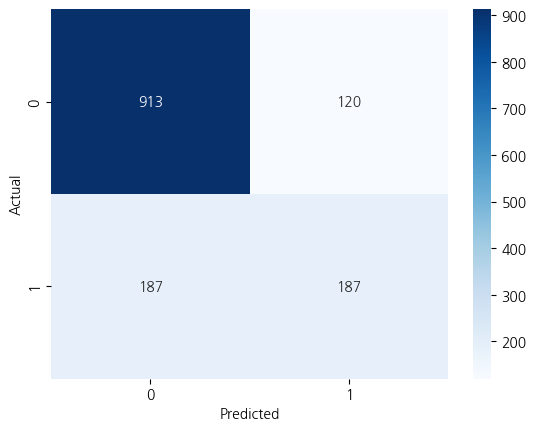

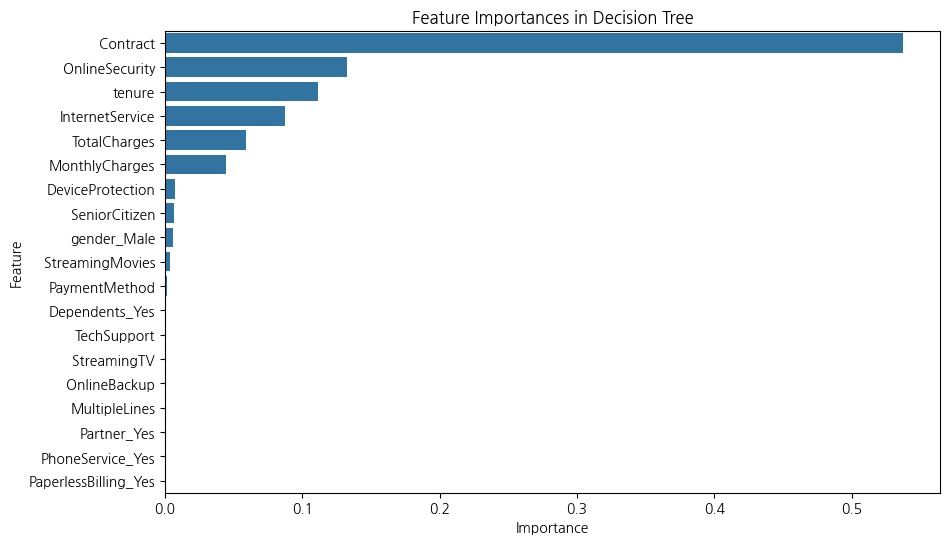

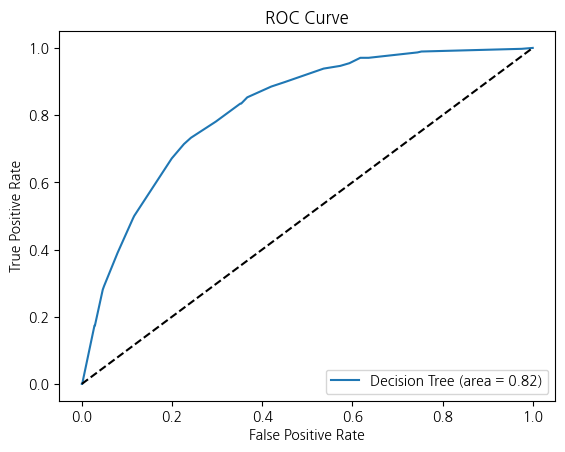

In [51]:

from sklearn.tree import DecisionTreeClassifier

y=cate_df['Churn_Yes']
X=cate_df.drop(columns=['Churn_Yes'])
X_train_dtc, X_test_dtc, y_train_dtc, y_test_dtc = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

dtc=DecisionTreeClassifier(max_depth=5, random_state=42)
dtc.fit(X_train_dtc, y_train_dtc)
y_pred = dtc.predict(X_test_dtc)
print(classification_report(y_test_dtc, y_pred))
conf_matrix = confusion_matrix(y_test_dtc, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

importances = dtc.feature_importances_

# 2. 데이터프레임으로 변환
feature_imp = pd.DataFrame({
    'Feature': X_train_dtc.columns, 
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# 3. 시각화
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_imp)
plt.title('Feature Importances in Decision Tree')
plt.show()
y_pred_dtc = dtc.predict(X_test_dtc)
y_proba_dtc = dtc.predict_proba(X_test_dtc)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test_dtc, y_proba_dtc)
plt.plot(fpr, tpr, label='Decision Tree (area = {:.2f})'.format(roc_auc_score(y_test_dtc, y_proba_dtc)))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

              precision    recall  f1-score   support

           0       0.83      0.89      0.86      1033
           1       0.63      0.51      0.56       374

    accuracy                           0.79      1407
   macro avg       0.73      0.70      0.71      1407
weighted avg       0.78      0.79      0.78      1407



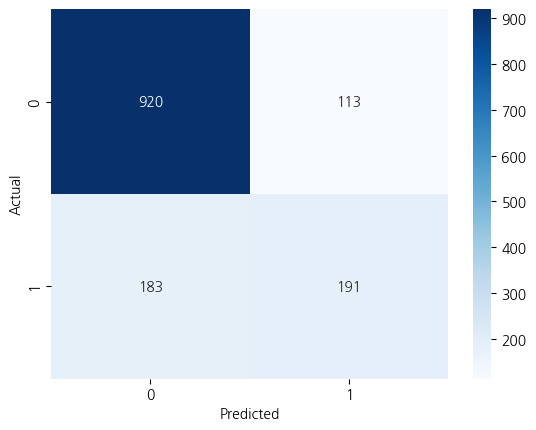

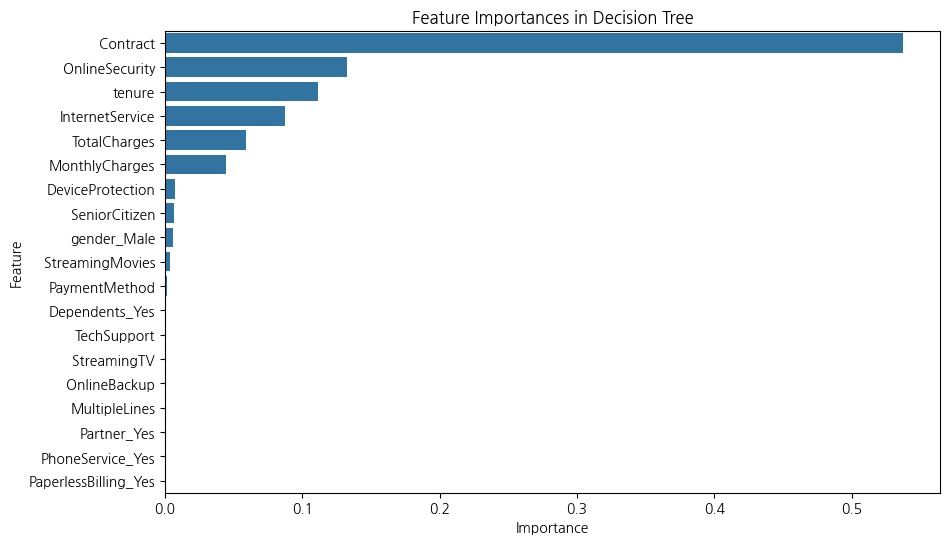

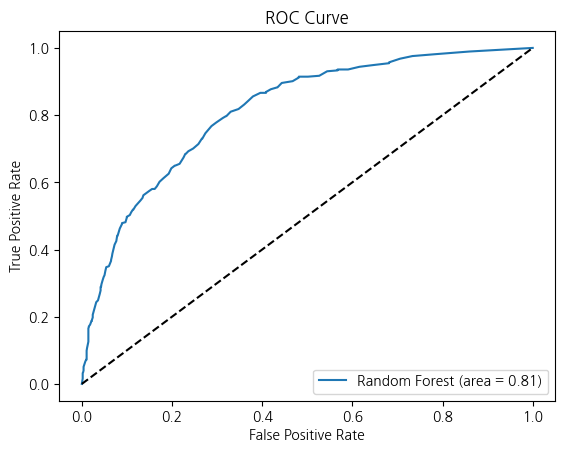

In [53]:
y=cate_df['Churn_Yes']
X=cate_df.drop(columns=['Churn_Yes'])
X_train_rfc, X_test_rfc, y_train_rfc, y_test_rfc = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

rfc=RandomForestClassifier(n_estimators=100, random_state=42)
rfc.fit(X_train_rfc, y_train_rfc)
y_pred = rfc.predict(X_test_rfc)
print(classification_report(y_test_rfc, y_pred))
conf_matrix = confusion_matrix(y_test_rfc, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

importances = dtc.feature_importances_

# 2. 데이터프레임으로 변환
feature_imp = pd.DataFrame({
    'Feature': X_train_rfc.columns, 
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# 3. 시각화
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_imp)
plt.title('Feature Importances in Decision Tree')
plt.show()
y_pred_rfc = rfc.predict(X_test_rfc)
y_proba_rfc = rfc.predict_proba(X_test_rfc)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test_rfc, y_proba_rfc)
plt.plot(fpr, tpr, label='Random Forest (area = {:.2f})'.format(roc_auc_score(y_test_rfc, y_proba_rfc)))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

[LightGBM] [Info] Number of positive: 1495, number of negative: 4130
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000285 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 626
[LightGBM] [Info] Number of data points in the train set: 5625, number of used features: 19
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.265778 -> initscore=-1.016151
[LightGBM] [Info] Start training from score -1.016151
              precision    recall  f1-score   support

           0       0.84      0.87      0.86      1033
           1       0.60      0.54      0.57       374

    accuracy                           0.78      1407
   macro avg       0.72      0.70      0.71      1407
weighted avg       0.78      0.78      0.78      1407



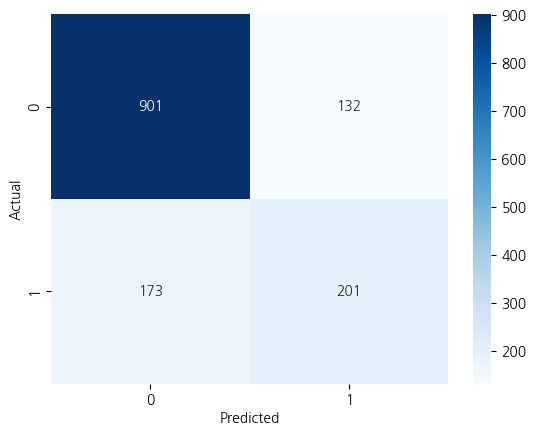

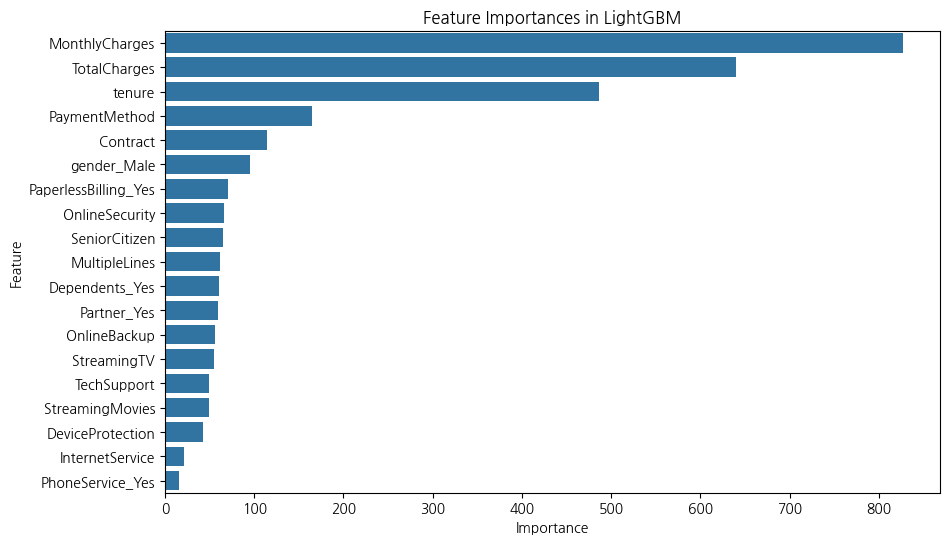

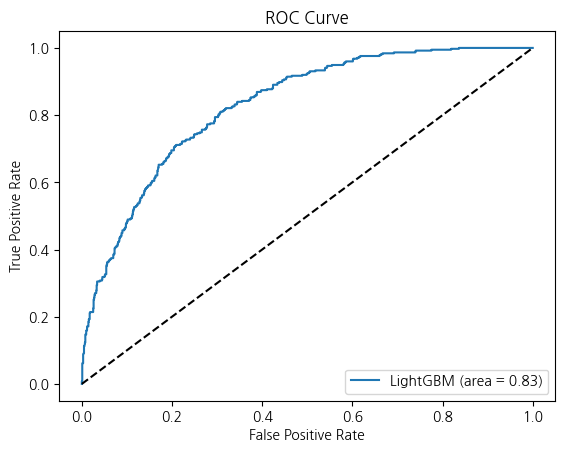

In [54]:
y=cate_df['Churn_Yes']
X=cate_df.drop(columns=['Churn_Yes'])

X_train_lgbm, X_test_lgbm, y_train_lgbm, y_test_lgbm = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
lgbm_model = LGBMClassifier(n_estimators=100, random_state=42)
lgbm_model.fit(X_train_lgbm, y_train_lgbm)
y_pred_lgbm = lgbm_model.predict(X_test_lgbm)
print(classification_report(y_test_lgbm, y_pred_lgbm))
conf_matrix = confusion_matrix(y_test_lgbm, y_pred_lgbm)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()
importances = lgbm_model.feature_importances_
# 2. 데이터프레임으로 변환
feature_imp = pd.DataFrame({
    'Feature': X_train_lgbm.columns, 
    'Importance': importances
}).sort_values(by='Importance', ascending=False)
# 3. 시각화
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_imp)
plt.title('Feature Importances in LightGBM')
plt.show()
y_proba_lgbm = lgbm_model.predict_proba(X_test_lgbm)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test_lgbm, y_proba_lgbm)
plt.plot(fpr, tpr, label='LightGBM (area = {:.2f})'.format(roc_auc_score(y_test_lgbm, y_proba_lgbm)))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

              precision    recall  f1-score   support

           0       0.84      0.89      0.86      1033
           1       0.63      0.52      0.57       374

    accuracy                           0.79      1407
   macro avg       0.73      0.71      0.72      1407
weighted avg       0.78      0.79      0.78      1407



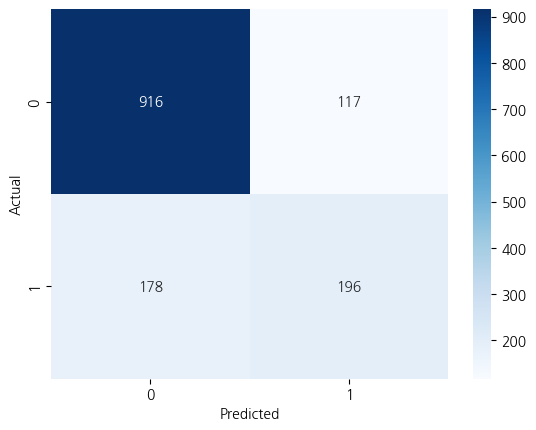

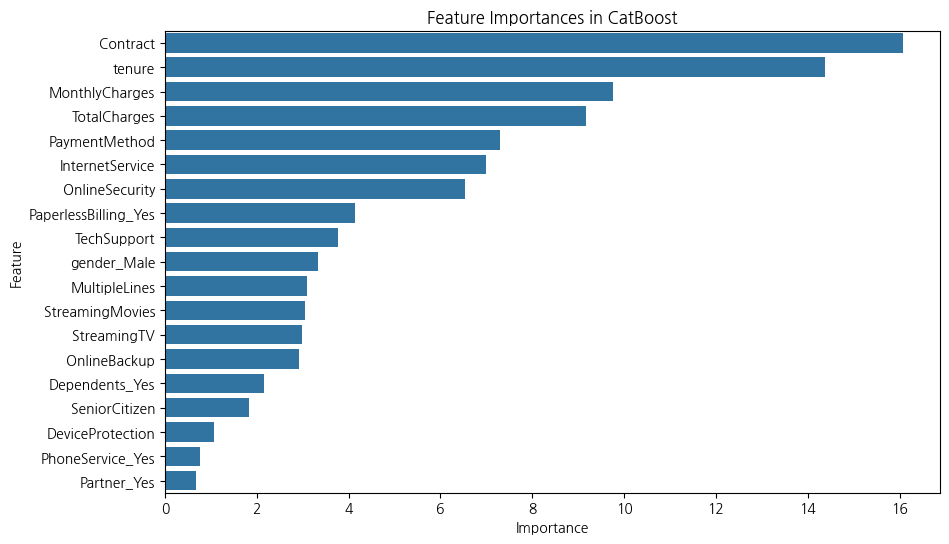

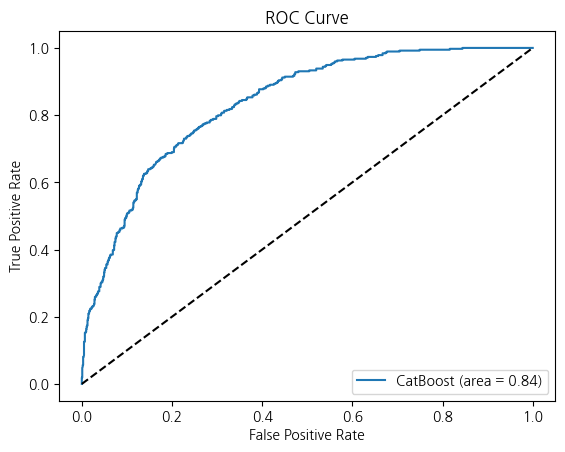

In [55]:
CatBoostRegressor
y=cate_df['Churn_Yes']
X=cate_df.drop(columns=['Churn_Yes'])
X_train_cat, X_test_cat, y_train_cat, y_test_cat = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
cat_model = CatBoostClassifier(iterations=100, random_state=42, verbose=0)
cat_model.fit(X_train_cat, y_train_cat)
y_pred_cat = cat_model.predict(X_test_cat)
print(classification_report(y_test_cat, y_pred_cat))
conf_matrix = confusion_matrix(y_test_cat, y_pred_cat)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()
importances = cat_model.get_feature_importance()
# 2. 데이터프레임으로 변환
feature_imp = pd.DataFrame({
    'Feature': X_train_cat.columns, 
    'Importance': importances
}).sort_values(by='Importance', ascending=False)
# 3. 시각화
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_imp)
plt.title('Feature Importances in CatBoost')
plt.show()
y_proba_cat = cat_model.predict_proba(X_test_cat)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test_cat, y_proba_cat)
plt.plot(fpr, tpr, label='CatBoost (area = {:.2f})'.format(roc_auc_score(y_test_cat, y_proba_cat)))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

              precision    recall  f1-score   support

           0       0.83      0.86      0.84      1033
           1       0.56      0.51      0.53       374

    accuracy                           0.76      1407
   macro avg       0.70      0.68      0.69      1407
weighted avg       0.76      0.76      0.76      1407



c:\Users\songj\miniforge3\Lib\site-packages\xgboost\training.py:199: UserWarning: [17:49:52] WARNING: D:\bld\xgboost-split_1763746773926\work\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


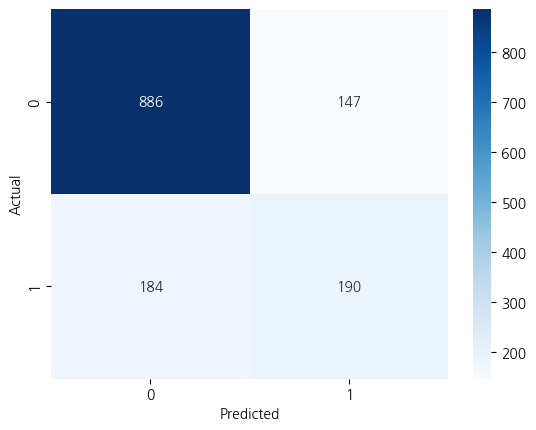

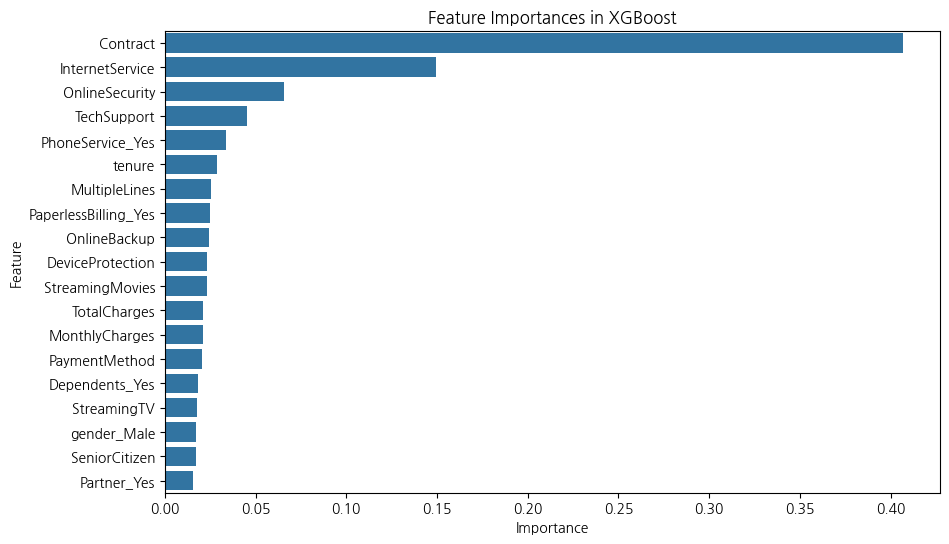

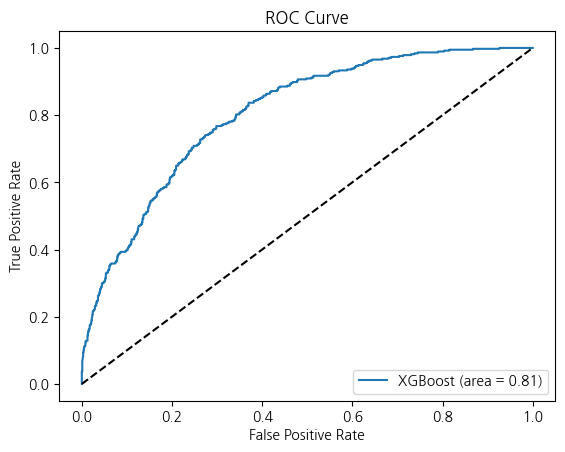

In [56]:
XGBRegressor
y=cate_df['Churn_Yes']
X=cate_df.drop(columns=['Churn_Yes'])
X_train_xgb, X_test_xgb, y_train_xgb, y_test_xgb = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
xgb_model = XGBClassifier(n_estimators=100, random_state=42, use_label_encoder=False, eval_metric='logloss')
xgb_model.fit(X_train_xgb, y_train_xgb)
y_pred_xgb = xgb_model.predict(X_test_xgb)
print(classification_report(y_test_xgb, y_pred_xgb))
conf_matrix = confusion_matrix(y_test_xgb, y_pred_xgb)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()
importances = xgb_model.feature_importances_
# 2. 데이터프레임으로 변환
feature_imp = pd.DataFrame({
    'Feature': X_train_xgb.columns, 
    'Importance': importances
}).sort_values(by='Importance', ascending=False)
# 3. 시각화
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_imp)
plt.title('Feature Importances in XGBoost')
plt.show()
y_proba_xgb = xgb_model.predict_proba(X_test_xgb)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test_xgb, y_proba_xgb)
plt.plot(fpr, tpr, label='XGBoost (area = {:.2f})'.format(roc_auc_score(y_test_xgb, y_proba_xgb)))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

===== [1] 모델별 정확도 비교 =====
- 로지스틱 회귀: 0.8038
- 의사결정 나무: 0.7818
- 랜덤 포레스트: 0.7896


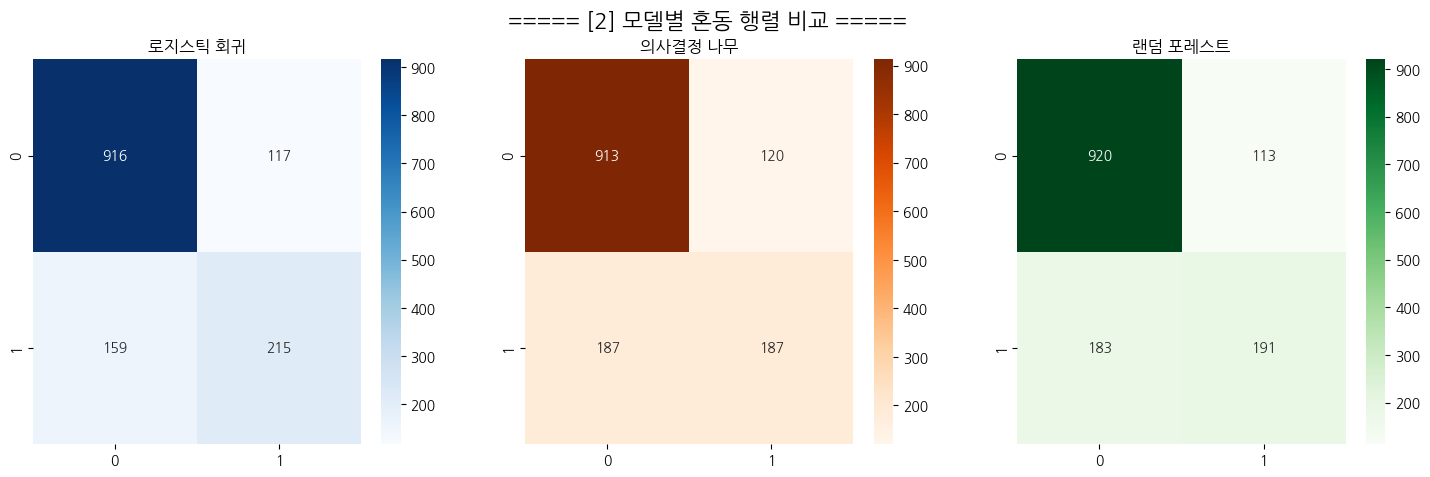


===== [3] 모델별 분류 리포트 비교 =====
--- 로지스틱 회귀 ---
              precision    recall  f1-score   support

           0       0.85      0.89      0.87      1033
           1       0.65      0.57      0.61       374

    accuracy                           0.80      1407
   macro avg       0.75      0.73      0.74      1407
weighted avg       0.80      0.80      0.80      1407

--- 의사결정 나무 ---
              precision    recall  f1-score   support

           0       0.83      0.88      0.86      1033
           1       0.61      0.50      0.55       374

    accuracy                           0.78      1407
   macro avg       0.72      0.69      0.70      1407
weighted avg       0.77      0.78      0.77      1407

--- 랜덤 포레스트 ---
              precision    recall  f1-score   support

           0       0.83      0.89      0.86      1033
           1       0.63      0.51      0.56       374

    accuracy                           0.79      1407
   macro avg       0.73      0.70      0.71      

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# 2. 혼동 행렬(Confusion Matrix) 시각화
# TODO-8: 각 모델의 예측 결과를 바탕으로 혼동 행렬(confusion_matrix)을 계산하세요.
cm_lr = confusion_matrix(y_test_lr, y_pred_lr)
cm_dtc = confusion_matrix(y_test_dtc, y_pred_dtc)
cm_rfc = confusion_matrix(y_test_rfc, y_pred_rfc)

fig, axes = plt.subplots(1, 3, figsize=(18, 5))
fig.suptitle('===== [2] 모델별 혼동 행렬 비교 =====', fontsize=16)
sns.heatmap(cm_lr, annot=True, fmt='d', cmap='Blues', ax=axes[0])
axes[0].set_title('로지스틱 회귀')
sns.heatmap(cm_dtc, annot=True, fmt='d', cmap='Oranges', ax=axes[1])
axes[1].set_title('의사결정 나무')
sns.heatmap(cm_rfc, annot=True, fmt='d', cmap='Greens', ax=axes[2])
axes[2].set_title('랜덤 포레스트')
plt.show()

# 3. 분류 리포트(Classification Report) 비교
# TODO-9: 각 모델의 예측 결과를 바탕으로 분류 리포트(classification_report)를 출력하세요.
print("\n===== [3] 모델별 분류 리포트 비교 =====")
print("--- 로지스틱 회귀 ---")
print(classification_report(y_test_lr, y_pred_lr))
print("--- 의사결정 나무 ---")
print(classification_report(y_test_dtc, y_pred_dtc))
print("--- 랜덤 포레스트 ---")
print(classification_report(y_test_rfc, y_pred_rfc))

In [60]:
# 1. 정확도(Accuracy) 비교
# TODO-7: 각 모델의 예측 결과를 바탕으로 정확도(accuracy_score)를 계산하세요.
accuracy_lr = accuracy_score(y_test_lr, y_pred_lr)
accuracy_dt = accuracy_score(y_test_dtc, y_pred_dtc)
accuracy_rfc = accuracy_score(y_test_rfc, y_pred_rfc)

print("===== 모델별 정확도 비교 =====")
print("===== Accuracy =====")
print(f" 로지스틱 회귀 : {accuracy_score(y_test_lr, y_pred_lr):0.4f}")
print(f" 의사결정 나무 : {accuracy_score(y_test_dtc, y_pred_dtc):0.4f}")
print(f" 랜덤 포레스트 : {accuracy_score(y_test_rfc, y_pred_rfc):0.4f}")
print(f" LightGBM : {accuracy_score(y_test_lgbm, y_pred_lgbm):0.4f}")
print(f" CatBoost : {accuracy_score(y_test_cat, y_pred_cat):0.4f}")
print(f" XGBoost : {accuracy_score(y_test_xgb, y_pred_xgb):0.4f}")

print("===== Precision =====")
print(f" 로지스틱 회귀 : {precision_score(y_test_lr, y_pred_lr):0.4f}")
print(f" 의사결정 나무 : {precision_score(y_test_dtc, y_pred_dtc):0.4f}")
print(f" 랜덤 포레스트 : {precision_score(y_test_rfc, y_pred_rfc):0.4f}")
print(f" LightGBM : {precision_score(y_test_lgbm, y_pred_lgbm):0.4f}")
print(f" CatBoost : {precision_score(y_test_cat, y_pred_cat):0.4f}")
print(f" XGBoost : {precision_score(y_test_xgb, y_pred_xgb):0.4f}")

print("===== Recall =====")
print(f" 로지스틱 회귀 : {recall_score(y_test_lr, y_pred_lr):0.4f}")
print(f" 의사결정 나무 : {recall_score(y_test_dtc, y_pred_dtc):0.4f}")
print(f" 랜덤 포레스트 : {recall_score(y_test_rfc, y_pred_rfc):0.4f}")
print(f" LightGBM : {recall_score(y_test_lgbm, y_pred_lgbm):0.4f}")
print(f" CatBoost : {recall_score(y_test_cat, y_pred_cat):0.4f}")
print(f" XGBoost : {recall_score(y_test_xgb, y_pred_xgb):0.4f}")

print("===== F1-score =====")
print(f" 로지스틱 회귀 : {f1_score(y_test_lr, y_pred_lr):0.4f}")
print(f" 의사결정 나무 : {f1_score(y_test_dtc, y_pred_dtc):0.4f}")
print(f" 랜덤 포레스트 : {f1_score(y_test_rfc, y_pred_rfc):0.4f}")
print(f" LightGBM : {f1_score(y_test_lgbm, y_pred_lgbm):0.4f}")
print(f" CatBoost : {f1_score(y_test_cat, y_pred_cat):0.4f}")
print(f" XGBoost : {f1_score(y_test_xgb, y_pred_xgb):0.4f}")

print("===== ROC-AUC =====")
print(f" 로지스틱 회귀 : {roc_auc_score(y_test_lr, y_proba_lr):0.4f}")
print(f" 의사결정 나무 : {roc_auc_score(y_test_dtc, y_proba_dtc):0.4f}")
print(f" 랜덤 포레스트 : {roc_auc_score(y_test_rfc, y_proba_rfc):0.4f}")
print(f" LightGBM : {roc_auc_score(y_test_lgbm, y_proba_lgbm):0.4f}")
print(f" CatBoost : {roc_auc_score(y_test_cat, y_proba_cat):0.4f}")
print(f" XGBoost : {roc_auc_score(y_test_xgb, y_proba_xgb):0.4f}")

===== 모델별 정확도 비교 =====
===== Accuracy =====
 로지스틱 회귀 : 0.8038
 의사결정 나무 : 0.7818
 랜덤 포레스트 : 0.7896
 LightGBM : 0.7832
 CatBoost : 0.7903
 XGBoost : 0.7647
===== Precision =====
 로지스틱 회귀 : 0.6476
 의사결정 나무 : 0.6091
 랜덤 포레스트 : 0.6283
 LightGBM : 0.6036
 CatBoost : 0.6262
 XGBoost : 0.5638
===== Recall =====
 로지스틱 회귀 : 0.5749
 의사결정 나무 : 0.5000
 랜덤 포레스트 : 0.5107
 LightGBM : 0.5374
 CatBoost : 0.5241
 XGBoost : 0.5080
===== F1-score =====
 로지스틱 회귀 : 0.6091
 의사결정 나무 : 0.5492
 랜덤 포레스트 : 0.5634
 LightGBM : 0.5686
 CatBoost : 0.5706
 XGBoost : 0.5345
===== ROC-AUC =====
 로지스틱 회귀 : 0.8357
 의사결정 나무 : 0.8186
 랜덤 포레스트 : 0.8140
 LightGBM : 0.8294
 CatBoost : 0.8355
 XGBoost : 0.8057


# 피쳐 추가